In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# 값을 255로 나눠서 모든 픽셀 하나하나에 특징 스케일링 적용 => 픽셀 = 0~255 이것을 255로 나누면 값이 0~1 사이 (필수적)
# 훈련세트 이미지들에 이미지 증대 / 과적합 예방 => shear_range, zoom_range, horizontal_flip


# 이미지 증대 도구를 훈련세트의 이미지에 연결
train_data = train_datagen.flow_from_directory("../../../data/cnn/training_set", target_size=(64, 64), batch_size=32, class_mode='binary')
# 이미지의 최종 크기, 컨볼루션 신경망에 입력될 이미지
# 배치의 크기로 각 배치에 들어가는 이미지의 장수 / 32는 전형적인 기본값
# binary / categorical 중 하나 -> 이진 결과 = binary

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory("../../../data/cnn/test_set", target_size=(64, 64), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
#building the CNN
model = keras.Sequential()

#Convolution
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#Pooling
model.add(keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2, strides=2))

#Adding a second convolution layer
model.add(keras.layers.Flatten())

#Full Connection
model.add(keras.layers.Dense(units=128, activation='relu'))

#Output Layer
model.add(keras.layers.Dense(units=1, activation='sigmoid')) #units=1 -> 최종 출력 계층의 뉴련 숫자 / 이진 분류(0, 1)

model.summary()

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x = train_data, validation_data=test_data, epochs = 25) #validation_data=cnn을 평가하려는 세트

checkpoint_cb = keras.callbacks.ModelCheckpoint('cat-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(x=train_data, validation_data=test_data, epochs=20, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/25


/opt/homebrew/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.5436 - loss: 0.7665 - val_accuracy: 0.5890 - val_loss: 0.6665
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.6499 - loss: 0.6293 - val_accuracy: 0.6795 - val_loss: 0.5932
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.6907 - loss: 0.5798 - val_accuracy: 0.7000 - val_loss: 0.5793
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7153 - loss: 0.5633 - val_accuracy: 0.7355 - val_loss: 0.5443
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7310 - loss: 0.5517 - val_accuracy: 0.7280 - val_loss: 0.5427
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7265 - loss: 0.5327 - val_accuracy: 0.7320 - val_loss: 0.5252
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - accuracy: 0.7429 - loss: 0.5174 - val_accuracy: 0.7065 - val_loss: 0.5815
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7487 - loss: 0.5119 - val_accurac

KeyboardInterrupt: 

In [20]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │     1,638,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,657,993 (6.32 MB)

 Trainable params: 1,657,993 (6.32 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# loss='sparse_categorical_crossentropy': 다중 클래스 분류 문제에서 사용 / 클래스 레이블이 정수로 인코딩된 경우에 유
# categorical_crossentropy: 다중 클래스 분류 문제에서 레이블이 원-핫 인코딩된 경우
# binary_crossentropy: 이진 분류 문제에서 사용됩니다
# mean_squared_error: 회귀 문제 / 예측값과 실제값 간의 제곱 차이를 평균한 값
# mean_absolute_error: 회귀 문제 / 예측값과 실제값 간의 절대 차이를 평균한 값

model.fit(x = train_data, validation_data=test_data, epochs = 25) #validation_data=cnn을 평가하려는 세트

# checkpoint_cb = keras.callbacks.ModelCheckpoint('cat-cnn-model.keras', save_best_only=True)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# history = model.fit(x=train_data, validation_data=test_data, epochs=25, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.5692 - loss: 0.6826 - val_accuracy: 0.6960 - val_loss: 0.5836
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.6850 - loss: 0.5948 - val_accuracy: 0.7295 - val_loss: 0.5548
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7146 - loss: 0.5513 - val_accuracy: 0.7475 - val_loss: 0.5298
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7332 - loss: 0.5182 - val_accuracy: 0.7650 - val_loss: 0.5044
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7667 - loss: 0.4876 - val_accuracy: 0.7595 - val_loss: 0.4889
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7785 - loss: 0.4736 - val_accuracy: 0.7805 - val_loss: 0.4700
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.7926 - loss: 0.4452 - val_accuracy: 0.7890 - val_loss: 0.4622
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7850 - loss: 0.4587 - 

## 시각화

In [14]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널 크기 = (3, 3) / 깊이 1 / 필터 개수 32 -> (3, 3, 1, 32) / 필터마다 1개의 절편 -> (32, )

(3, 3, 3, 32) (32,)


In [15]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.013132455 0.13056277


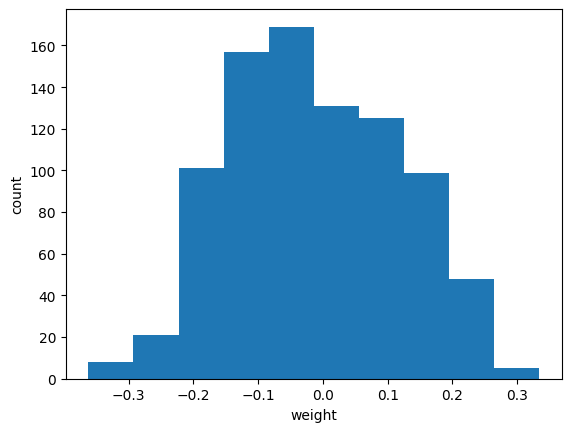

In [16]:
# 가중치의 분포
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

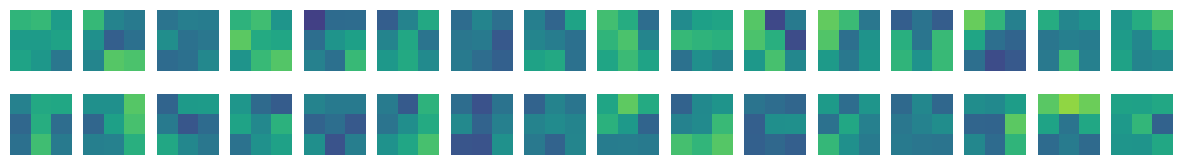

In [17]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [18]:
from keras.preprocessing import image

# predict 메소드는 훈련에 사용했던 것과 똑같은 형식에서 불러와야 한다.
test_image = image.load_img('../../../data/cnn/쫀떡.png', target_size=(64,64))

# pil => 이미지를 배열에 놓는 형식
test_image = image.img_to_array(test_image) # pil 이미지 인스턴스를 넘파이 배열로 변환하는 것
test_image = np.expand_dims(test_image, axis=0)
# 가짜 차원을 추가하거나 batch_size에 상응하는 차원을 추가 / 어디에 추가 차원을 넣을지 -> 항상 첫 번째 차원, 각 배치 안에 다른 이미지들이 들어간다

result = model.predict(test_image)
print(result)

train_data.class_indices #class_indices: 알맞은 클래스 인덱스를 갖게 된다
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[1.]]


In [19]:
print(prediction)

dog


In [ ]:
dense1 = keras.layers.Dense(100, activation='softmax')
dense2 = keras.layers.Dense(1, activation='sigmoid')

hidden = dense1(inputs)

outputs = dense2(hidden)

model = keras.Model(inputs, outputs)